<a href="https://colab.research.google.com/github/RavinduP/Product_Success/blob/Market_demand_forecasting/xgboost_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
!pip install category_encoders
import category_encoders as ce


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Load the dataset (adjust the file path in Colab as needed)
file_path = '/content/Ladders updated data.xlsx'
data = pd.ExcelFile(file_path)

# Load the 'Data' sheet
df = data.parse('Data')

# Display the first few rows to understand the structure
print(df.head())

  Billing Date  Net Weight Sales Region  Invoice Value      Material Code  \
0   2023-02-08    0.010106           EX          71.50  FAML0504N000N2000   
1   2022-09-22    0.005570           R2       10732.17  FASL3000M001L0700   
2   2022-09-22    0.004850           R2        9202.18  FASL3000M001L0600   
3   2022-09-22    0.007850           R2       15373.92  FASL2000M001N0800   
4   2022-10-16    0.004850           R2        9202.18  FASL3000M001L0600   

                   Size  QTY(EA)  
0  Multy Purpose Ladder        1  
1           STEP LADDER        1  
2           STEP LADDER        1  
3           STEP LADDER        1  
4           STEP LADDER        1  


In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

# Check unique values in categorical columns
categorical_cols = ['Sales Region', 'Material Code', 'Size']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Convert Billing Date to datetime format
df['Billing Date'] = pd.to_datetime(df['Billing Date'])

# Extract time-based features
df['Year'] = df['Billing Date'].dt.year
df['Month'] = df['Billing Date'].dt.month
df['Day'] = df['Billing Date'].dt.day
df['Weekday'] = df['Billing Date'].dt.weekday
df['Quarter'] = df['Billing Date'].dt.quarter

# Display updated dataset
print("\nDataset after adding time-based features:")
display(df.head())

First 5 rows of the dataset:


,Billing Date,Net Weight,Sales Region,Invoice Value,Material Code,Size,QTY(EA)
0,2023-02-08,0.010106,EX,71.50,FAML0504N000N2000,Multy Purpose Ladder,1
1,2022-09-22,0.005570,R2,10732.17,FASL3000M001L0700,STEP LADDER,1
2,2022-09-22,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1
3,2022-09-22,0.007850,R2,15373.92,FASL2000M001N0800,STEP LADDER,1
4,2022-10-16,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7660 entries, 0 to 7659
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Billing Date   7660 non-null   datetime64[ns]
 1   Net Weight     7660 non-null   float64       
 2   Sales Region   7660 non-null   object        
 3   Invoice Value  7660 non-null   float64       
 4   Material Code  7660 non-null   object        
 5   Size           7660 non-null   object        
 6   QTY(EA)        7660 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 419.0+ KB

Missing Values:
Billing Date     0
Net Weight       0
Sales Region     0
Invoice Value    0
Material Code    0
Size             0
QTY(EA)          0
dtype: int64

Summary Statistics:


,Billing Date,Net Weight,Invoice Value,QTY(EA)
count,7660,7660.000000,7.660000e+03,7660.000000
mean,2023-10-20 03:02:09.712793856,4.729594,4.328887e+04,3.665144
min,2022-04-28 00:00:00,-107.280000,-3.520716e+06,-78.000000
25%,2023-05-16 18:00:00,0.005570,7.741040e+03,1.000000
50%,2023-11-30 00:00:00,0.010106,1.679306e+04,1.000000
75%,2024-04-19 00:00:00,0.039250,3.049486e+04,2.000000
max,2024-10-31 00:00:00,1050.000000,3.520716e+06,173.000000
std,NaN,30.823669,1.404670e+05,9.967725



Unique values in Sales Region:
['EX' 'R2' 'R1' 'R8' 'R7' 'R5' 'DR' 'R4' 'R6' 'PR' 'R3' 'PR-EX']

Unique values in Material Code:
['FAML0504N000N2000' 'FASL3000M001L0700' 'FASL3000M001L0600'
 'FASL2000M001N0800' 'FASL3000M001L0500' 'FASL3000M001L0400'
 'FASL2000M001N0900' 'FASL2000M001N1000' 'FAML0304M001N1200'
 'FASL3000M001L0800' 'FAML0304N000N1200' 'FAML0404N000N1600'
 'FASL3000M000L0600' 'FASL2000M000N0800' 'FASL2000M000N0900'
 'FASL2000M000N1000' 'FASL3000M000L0400' 'FASL3000M000L0500'
 'FASL3000M000L0700']

Unique values in Size:
['Multy Purpose Ladder' 'STEP LADDER']

Dataset after adding time-based features:


,Billing Date,Net Weight,Sales Region,Invoice Value,Material Code,Size,QTY(EA),Year,Month,Day,Weekday,Quarter
0,2023-02-08,0.010106,EX,71.50,FAML0504N000N2000,Multy Purpose Ladder,1,2023,2,8,2,1
1,2022-09-22,0.005570,R2,10732.17,FASL3000M001L0700,STEP LADDER,1,2022,9,22,3,3
2,2022-09-22,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1,2022,9,22,3,3
3,2022-09-22,0.007850,R2,15373.92,FASL2000M001N0800,STEP LADDER,1,2022,9,22,3,3
4,2022-10-16,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1,2022,10,16,6,4


In [ ]:

# Check for negative sales (returns/cancellations)
print("\nNegative Sales (Returns):")
display(df[df['QTY(EA)'] < 0])


Negative Sales (Returns):


,Billing Date,Net Weight,Sales Region,Invoice Value,Material Code,Size,QTY(EA),Year,Month,Day,Weekday,Quarter
44,2023-03-07,-0.01975,R8,-32343.04,FASL3000M001L0500,STEP LADDER,-5,2023,3,7,1,1
48,2023-03-11,-0.00785,R8,-12937.22,FASL2000M001N0800,STEP LADDER,-1,2023,3,11,5,1
49,2023-03-11,-0.00557,R8,-9031.22,FASL3000M001L0700,STEP LADDER,-1,2023,3,11,5,1
102,2022-04-30,-0.01671,DR,-24305.56,FASL3000M001L0700,STEP LADDER,-3,2022,4,30,5,2
103,2022-04-30,-0.02016,DR,-30925.93,FASL2000M001N1000,STEP LADDER,-2,2022,4,30,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7655,2024-10-15,-7.85000,R2,-10534.59,FASL2000M000N0800,STEP LADDER,-1,2024,10,15,1,4
7656,2024-10-18,-10.08000,DR,-12705.96,FASL2000M000N1000,STEP LADDER,-1,2024,10,18,4,4
7657,2024-10-18,-7.85000,DR,-10164.96,FASL2000M000N0800,STEP LADDER,-1,2024,10,18,4,4
7658,2024-10-18,-5.57000,DR,-7095.96,FASL3000M000L0700,STEP LADDER,-1,2024,10,18,4,4


In [ ]:
# Handle negative sales values (treat as returns)
df = df[df['QTY(EA)'] > 0] # Change 'data' to 'df'
display(df[df['QTY(EA)'] > 0])

,Billing Date,Net Weight,Sales Region,Invoice Value,Material Code,Size,QTY(EA),Year,Month,Day,Weekday,Quarter
0,2023-02-08,0.010106,EX,71.50,FAML0504N000N2000,Multy Purpose Ladder,1,2023,2,8,2,1
1,2022-09-22,0.005570,R2,10732.17,FASL3000M001L0700,STEP LADDER,1,2022,9,22,3,3
2,2022-09-22,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1,2022,9,22,3,3
3,2022-09-22,0.007850,R2,15373.92,FASL2000M001N0800,STEP LADDER,1,2022,9,22,3,3
4,2022-10-16,0.004850,R2,9202.18,FASL3000M001L0600,STEP LADDER,1,2022,10,16,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7648,2024-10-29,40.785000,R3,91962.00,FAML0404N000N1600,Multy Purpose Ladder,5,2024,10,29,1,4
7649,2024-10-29,63.000000,R3,13274.60,FASL3000M000L0400,STEP LADDER,3,2024,10,29,1,4
7650,2024-10-29,105.000000,R3,27722.61,FASL3000M000L0500,STEP LADDER,5,2024,10,29,1,4
7651,2024-10-29,105.000000,R3,33187.83,FASL3000M000L0600,STEP LADDER,5,2024,10,29,1,4


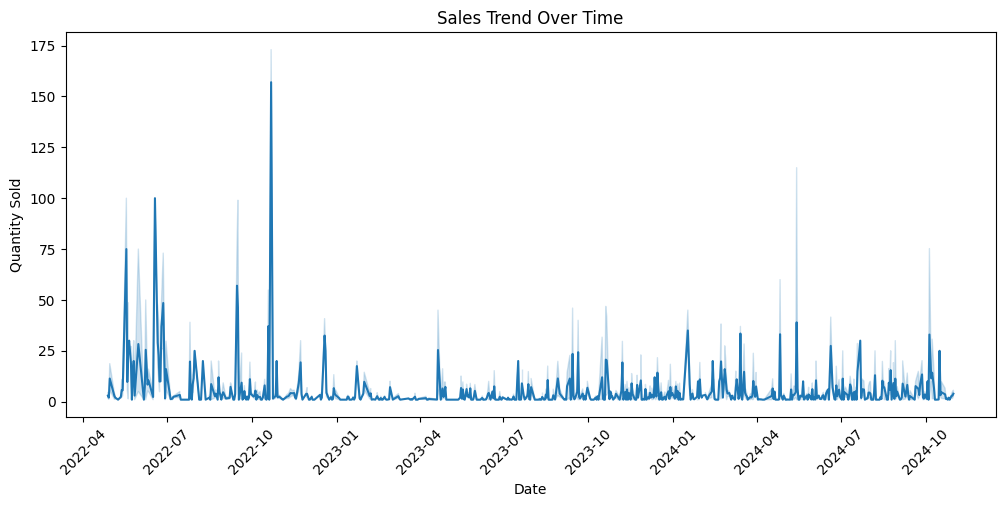

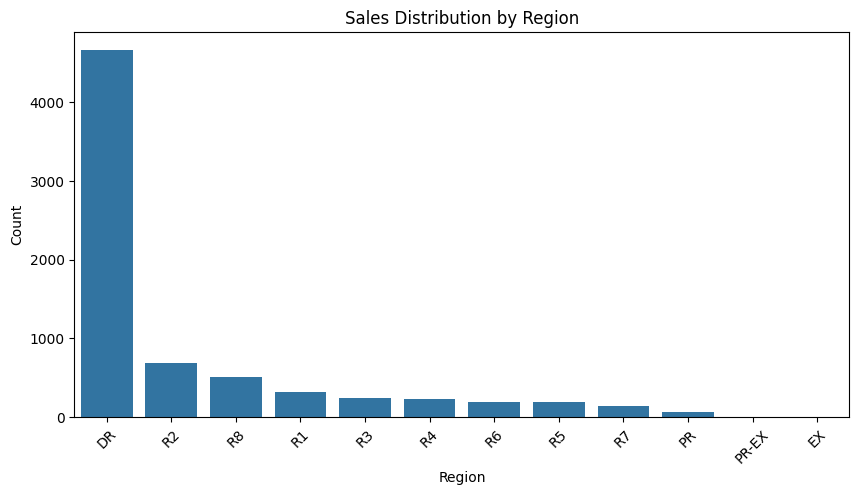

In [ ]:
# Visualize sales trends over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Billing Date'], y=df['QTY(EA)'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Region-wise sales distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Sales Region'], order=df['Sales Region'].value_counts().index)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Unique Sales Regions after mapping:
['Exports' 'Kandy' 'North' 'Key Accounts' 'Colombo' 'Negombo' 'Direct'
 'Southern' 'East' 'Projects' 'Kurunegala' 'Projects Export']


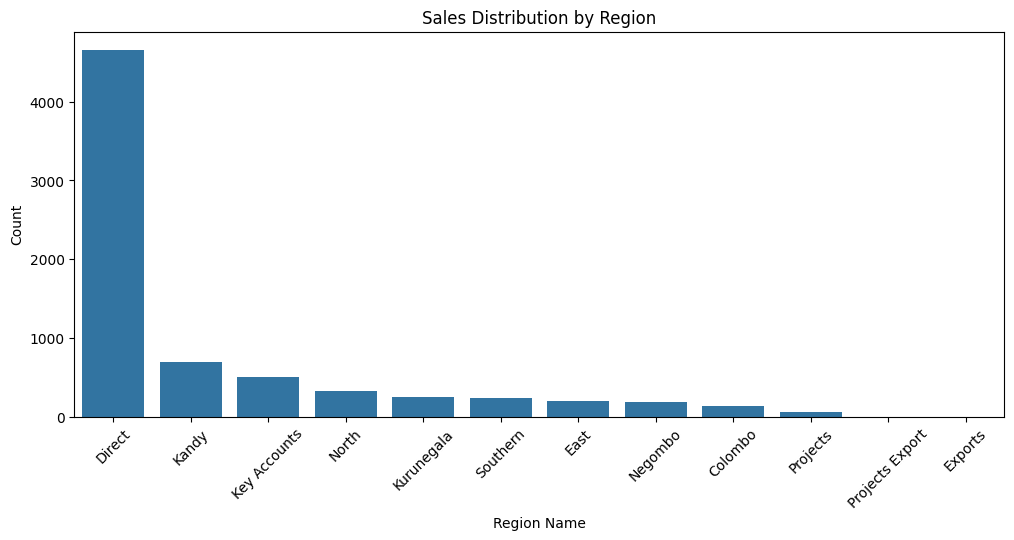

In [ ]:
# Define the mapping of Sales Region codes to their names
region_mapping = {
    'R1': 'North', 'R2': 'Kandy', 'R3': 'Kurunegala', 'R4': 'Southern',
    'R5': 'Negombo', 'R6': 'East', 'R7': 'Colombo', 'R8': 'Key Accounts',
    'PR': 'Projects', 'PR-EX': 'Projects Export', 'EX': 'Exports', 'DR': 'Direct'
}
# Replace Sales Region codes with actual names
df['Sales Region'] = df['Sales Region'].map(region_mapping)

# Check for missing mappings
print("\nUnique Sales Regions after mapping:")
print(df['Sales Region'].unique())

# Visualize sales distribution by region (with names)
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Sales Region'], order=df['Sales Region'].value_counts().index)
plt.title('Sales Distribution by Region')
plt.xlabel('Region Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 1: Check for Missing Values
print("\nChecking for missing values in the dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

# If missing values exist, handle them accordingly
# Fill missing numerical values with median
numerical_cols = ['Net Weight', 'Invoice Value', 'QTY(EA)']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


Checking for missing values in the dataset:
Series([], dtype: int64)


In [ ]:
from sklearn.model_selection import train_test_split

# Features
X = df.drop(columns=['Billing Date', 'QTY(EA)'])

# Target
y = df['QTY(EA)']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Before scaling, encode categorical features
categorical_features = ['Sales Region', 'Material Code', 'Size']
encoder = ce.OrdinalEncoder(cols=categorical_features)  # or ce.OneHotEncoder() for one-hot encoding
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
scaler = MinMaxScaler()

# Scale numerical features
numerical_features = ['Net Weight', 'Invoice Value']  # Add more if needed
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE without using 'squared' argument
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 0.47254592180252075
RMSE: 2.4891322430875142
MAPE: 7.048018894629836


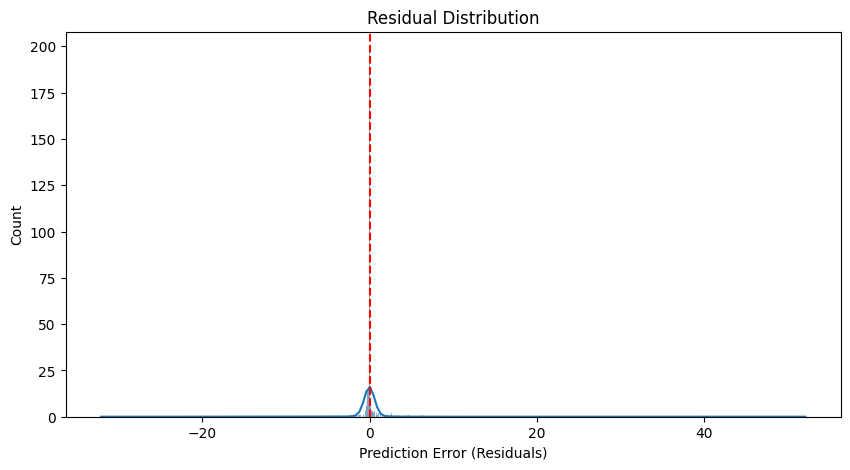

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.show()

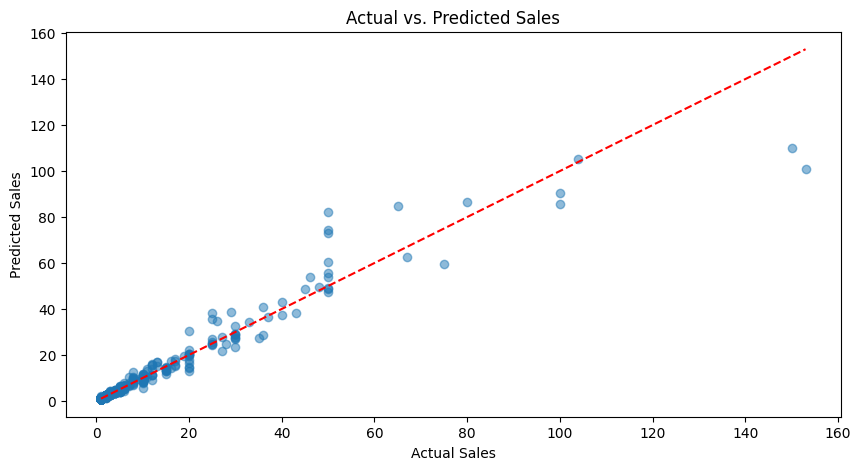

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


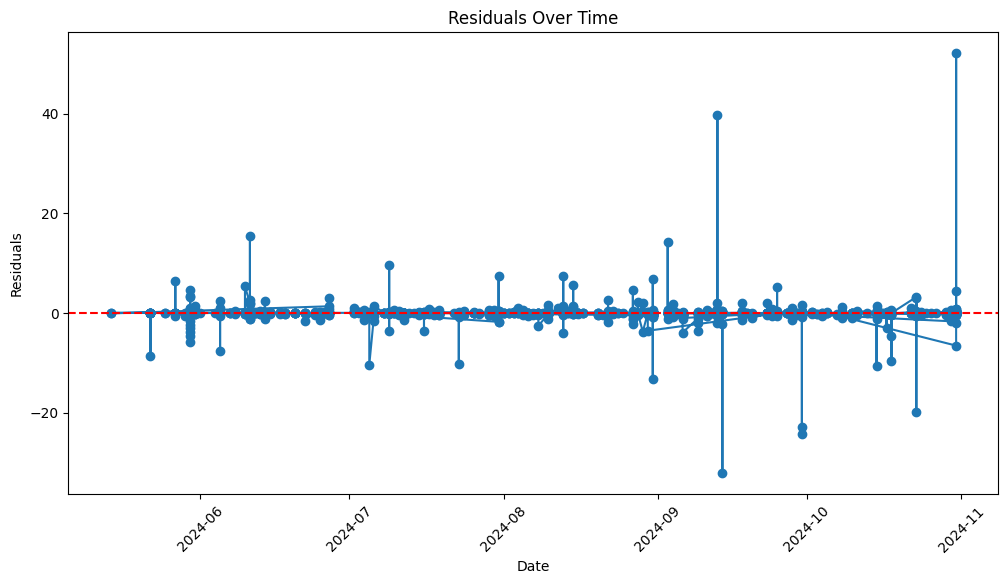

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Billing Date'].iloc[-len(y_test):], residuals, marker='o', linestyle='-')
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residuals Over Time")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display results in a grid format
eval_metrics = pd.DataFrame({
    "Metric": ["R² Score", "MAE", "RMSE", "MAPE"],
    "Value": [r2, mae, rmse, mape]
})

print(eval_metrics)

     Metric     Value
0  R² Score  0.941011
1       MAE  0.472546
2      RMSE  2.489132
3      MAPE  7.048019


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize model
xgb = XGBRegressor()

# Use Randomized Search
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", random_search.best_params_)

# Train model with best parameters
best_xgb = XGBRegressor(**random_search.best_params_)
best_xgb.fit(X_train, y_train)
model.save_model("xgboost_model.json")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.97490853 0.9734028  0.96526909 0.95624316 0.93114054]
Mean CV R² Score: 0.9601928234100342


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 0.47254592180252075
RMSE: 2.4891322430875142
MAPE: 7.048018894629836%


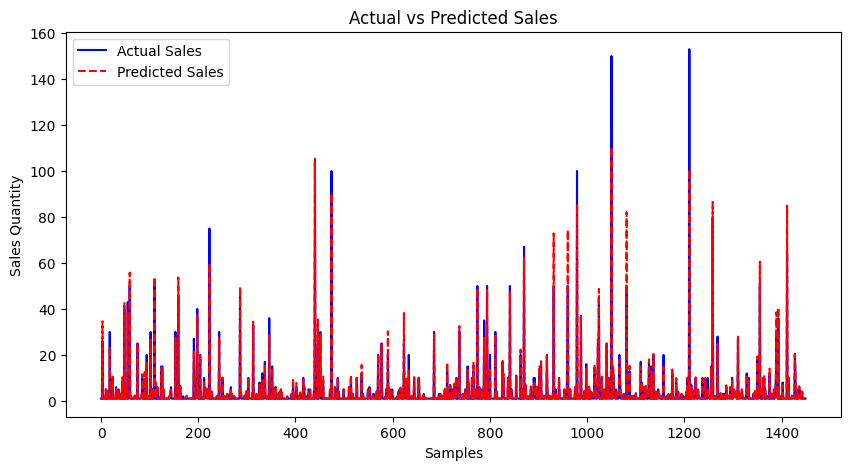

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Sales", color='blue')
plt.plot(y_pred, label="Predicted Sales", color='red', linestyle='dashed')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Samples")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

In [ ]:
# # Assign the most frequently sold Material Code
# most_common_material = df['Material Code'].mode()[0]
# future_df['Material Code'] = most_common_material

# # Assign the most common Sales Region
# most_common_region = df['Sales Region'].mode()[0]
# future_df['Sales Region'] = most_common_region
# # Ensure that the lag features are calculated correctly
# future_df['Lag_1'] = df['QTY(EA)'].shift(1).fillna(df['QTY(EA)'].median())
# future_df['Lag_7'] = df['QTY(EA)'].shift(7).fillna(df['QTY(EA)'].median())
# future_df['Lag_30'] = df['QTY(EA)'].shift(30).fillna(df['QTY(EA)'].median())
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical features the same way as in training
# label_enc = LabelEncoder()
# future_df['Material Code'] = label_enc.fit_transform(future_df['Material Code'])
# future_df['Sales Region'] = label_enc.fit_transform(future_df['Sales Region'])
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# future_df_scaled = scaler.fit_transform(future_df.drop(columns=['Billing Date']))
# # Predict future sales
# future_predictions = best_xgb.predict(future_df_scaled) # Changed xgb_model to best_xgb

# # Add predictions to DataFrame
# future_df['Predicted Sales'] = future_predictions

# # Display the first few rows of predicted sales
# print(future_df[['Billing Date', 'Predicted Sales']])
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(future_df['Billing Date'], future_df['Predicted Sales'], marker='o', linestyle='--', color='red', label="Predicted Sales")
# plt.title("Future Ladder Sales Predictions")
# plt.xlabel("Date")
# plt.ylabel("Predicted Quantity Sold")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.show()
